Myoelectric signals
===

* 41:42 min | Última modificación: Mayo 27, 2021 | [YouTube]

In [1]:
import warnings

warnings.filterwarnings("ignore")

## Lectura de datos

In [2]:
import pandas as pd


df = pd.read_csv(
    "https://raw.githubusercontent.com/jdvelasq/datalabs/master/datasets/myoelectric_signals.csv",
    sep = ',',         # separador de campos
    thousands = None,  # separador de miles para números
    decimal = '.')     # separador de los decimales para números

df.head()

,x1,x2,x3,x4,indicator
0,0.138,-0.168,-0.289,0.193,1
1,0.255,-0.029,0.134,-0.163,1
2,0.044,0.003,0.048,-0.017,0
3,-0.030,0.003,-0.050,0.028,0
4,0.001,0.019,0.016,0.023,0


In [3]:
df.describe()

,x1,x2,x3,x4,indicator
count,72.000000,72.000000,72.000000,72.000000,72.000000
mean,0.058292,-0.017681,0.010328,0.027611,0.472222
std,0.152580,0.145051,0.165051,0.149296,0.502731
min,-0.436000,-0.634000,-0.437000,-0.373000,0.000000
25%,-0.005250,-0.039500,-0.046250,-0.018000,0.000000
50%,0.025500,0.004500,-0.003000,0.019500,0.000000
75%,0.138750,0.026750,0.048750,0.069250,1.000000
max,0.614000,0.341000,0.588000,0.856000,1.000000


## Preparación

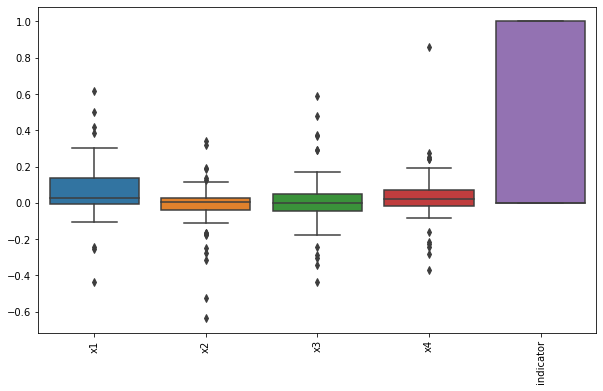

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

#
# Los rangos de las variables numéricas son
# bastantes diferentes
#
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90);

## Entrenamiento y Pronóstico

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

parameters = [
    {
        "hidden_layer_sizes": [(h,) for h in range(5)],
        "learning_rate_init": [
            0.01,
            0.05,
            0.10,
            0.15,
            0.20,
            0.25,
            0.30,
        ],
        "momentum": [
            0.60,
            0.70,
            0.80,
            0.90,
        ],
    },
]


m = GridSearchCV(
    MLPClassifier(
        activation="logistic",
        learning_rate="adaptive",
        max_iter=1000,
        verbose=0,
    ),
    parameters,
    cv=10,
)

#
# Se usa el 75% de los datos para entrenamiento
# concrete_train <- concrete_norm[1:773, ]
# concrete_test <- concrete_norm[774:1030, ]
#
m.fit(df[['x1', 'x2', 'x3', 'x4']].values, df.indicator)

m.best_estimator_

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(4,), learning_rate='adaptive',
              learning_rate_init=0.1, max_fun=15000, max_iter=1000,
              momentum=0.6, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=0, warm_start=False)

In [8]:
df['prediction'] = m.predict(df[['x1', 'x2', 'x3', 'x4']])
df[['indicator', 'prediction']]

,indicator,prediction
0,1,1
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
67,0,0
68,1,1
69,0,0
70,1,0


In [9]:
from sklearn.metrics import confusion_matrix

confusion_matrix(
    y_true=df.indicator,
    y_pred=df.prediction,
)

array([[38,  0],
       [ 1, 33]])

In [ ]:
%%writefile goldprices.csv
329.95 329.60 329.95 328.20 330.15 329.55 329.75 330.51
329.715 328.50 328.65 324.75 328.45 328.35 328.15 326.32
328.05 327.80 328.15 327,34 328.15 327.75 328.05 327.28
327.95 328.30 328.50 329.00 328.85 331.80 330.15 328.92
331.55 331.25 331.80 329.84 330.95 328.80 328.35 329.66
328.55 328.80 328.55 329.09 : 329.25 332.00 331.65 330.26
331.85 330.10 330.30 331.87 330,15 330.00 330.00 327.90
330.95 329.90 330.65 331.20 329.25 327.85 330.00 331.20
329.45 33350 329.60 328.55 330.55 329.20 330.15 330.73
329.85 329.50 329.55 329,31 329,35 328.15 328.75 327.78
329.15 328.35 328.55 327.63 328.95 329.40 330.10 328.57
330.05 328.80 329.45 330.40 328.45 328/75 328.25 330.40
329.65 329.60 330.15 331.41 328.75 327.00 327.35 326.87
327.35 326.75 326.45 328.47 326.75 326.15 326.55 326.03
326.75 327.00 327.10 327.11 327.05 327.90 327.15 325.86
328.05 329.05 328.65 327.71 329.15 328.85 329.00 329.10
328.55 328.80 329.35 329.10 329.45 330.25 330,45 330.00
330.65 331.50 331.30 331.94 332.45 332/70 332.60 331.97
331.75 331.60 331.75 331.90 331.25 332.20 331.35 330.90
332.65 332.50 332.15 332/78 332.065 332.25 332.50 333.81
332.05 332.00 332.05 331.92 333.15 336.35 335.75 332,20
337.25 336.75 338.35 338.34 336.95 338.20 336.75 336.93
339.45 340.00 340.35 338.28 339.45 339.10 339.30 338.52
338.05 337.50 338.40 338.85 337.35 337.75 336.60 337.47
337.85 337.00 337.30 336.94 337.85 337.00 337.25 336.94
337.85 336.50 337.30 336.94 337,15 336.95 336.65 336.32
337.25 338.50 339.20 338.66 339.55 336.60 338.65 339.71
337.25 338.50 339.05 338.23 340.55 339.90 339.85 340.19
341.15 :339.90 340.55 341.08 339.15 339.25 338.85 339.01
337.15 339.60 339.70 339.09 341.15 346.50 334.00 340.87
348.75 352.00 350.10 349.04 352.25 350.00 350.75 352.28
349.75 353.00 351.60 349.64 354.65 355.90 354.90 355.49
354.25 355.80 354.95 354.22

In [ ]:
%%writefile animal_features.csv
2.3113 .3._.3-_3
32.103.3._3._3
231123 ._30-_3
23119223 3
2311123 3
1311223 3
2100223 3
210032 .23 3
110021 ._3 3
1100213 03
110011 .3 3
1100003 3
110011 .3 3
331144023
33114402 3
33114453 2
33.11444s 1 2
331133102
33.11444s1s 2
3311393012
33.111431 2
32511331 2
331132 m1 m1
33.1132m1mu1
32.51144s1 s1
32. .1144s1su1
32511332 m2
211144s 1 s1
04.103.3-_3 -023
0410533 ._3 -U3
04.003 .3._3-.3
040033 _- 3